# Lista de Exercício 4
### Introdução à Visão Computacional (SEL0339/SEL5886)

**Instruções:**

 1. Esta lista consiste em 4 exercícios.
 1. Deve-se colocar comentários nos códigos desenvolvidos.
 1. As perguntas devem ser respondidas também como comentários no arquivo.
 1. Colocar seu nome e número USP abaixo.
 1. Quaisquer problemas na execução das listas, entrar em contato com os monitores.
 1. Depois de terminado os exercícios, deve ser gerado um arquivo **extensão .ipynb** para ser enviado ao professor pelo E-DISCIPLINAS da disciplina até a data máxima de entrega.
 1. Caso não seja enviado, o aluno ficará sem nota.


---



 <table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/LAVI-USP/SEL0339-SEL5886_2023/blob/main/praticas/Lista_de_Exercicio_4.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Executar no Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/LAVI-USP/SEL0339-SEL5886_2023/blob/main/praticas/Lista_de_Exercicio_4.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Ver codigo fonte no GitHub</a>
  </td>
</table>


`Nome: Thallys Oliveira`

`Número USP: 11819827`


### Introdução:


Vamos importar as bibliotecas que iremos utilizar:

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

from skimage.transform import hough_circle, hough_circle_peaks

#### **Atenção**: os códigos abaixo são para fazer o download das imagens (EXECUTE-OS). Os mesmos não fazem parte dessa prática.

In [25]:
import urllib.request


try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2023/raw/main/imagens/pratica_04/wirebond_mask.tif", "wirebond_mask.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2023/raw/main/imagens/pratica_04/house.tif", "house.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2023/raw/main/imagens/pratica_04/abobora.tif", "abobora.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2023/raw/main/imagens/pratica_04/sudoku.tif", "sudoku.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")


try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2023/raw/main/imagens/pratica_04/cores.jpeg", "cores.jpeg")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")



[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor
[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor
[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor
[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor
[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor


## 1) Detector de bordas

#### 1.1) Prewitt e Sobel (Nota 1.5/10)

1. Aplicar os detectores de bordas **verticais e horizontais** de Prewitt na imagem ```wirebond_mask.tif```. Mostre a imagens original e as resultantes em um subplot.

2. Aplicar os detectores de bordas **verticais e horizontais** de Sobel na imagem ```wirebond_mask.tif```. Mostre a imagens original e as resultantes em um subplot.

2. Comente os resultados encontrados.

**Dicas:**

* Nós criamos uma lista contendo os *kernels* de cada método. Note que vários *kernels* foram fornecidos abaixo. Alguns serão utilizados no próximo exercício também.
* Você pode criar um laço de repetição para pegar cada kernel da lista. Segue abaixo um exemplo de um `for loop` em uma lista.

``` python
kernel_lista = [kernel1,kernel2,kernel3]
for kernel in kernel_lista:
  print(kernel)

```

In [27]:
# Prewitt
p1 = np.array(((-1,-1,-1),
               ( 0, 0, 0),
               ( 1, 1, 1)))

p2 = np.array(((-1, 0, 1),
               (-1, 0, 1),
               (-1, 0, 1)))

# Lista com todos os kernels (Prewitt)
prewitt = [p1,p2]

# Sobel
s1 = np.array(((-1,-2,-1),
               ( 0, 0, 0),
               ( 1, 2, 1)))

s2 = np.array(((-1, 0, 1),
               (-2, 0, 2),
               (-1, 0, 1)))

s3 = np.array(((-2,-1, 0),
               (-1, 0, 1),
               ( 0, 1, 2)))

s4 = np.array((( 0, 1, 2),
               (-1, 0, 1),
               (-2,-1, 0)))

s5 = np.array((( 2, 1, 0),
               ( 1, 0,-1),
               ( 0,-1,-2)))

s6 = np.array((( 0,-1,-2),
               ( 1, 0,-1),
               ( 2, 1, 0)))

# Lista com todos os kernels (Sobel)
sobel = [s1,s2,s3,s4,s5,s6]

# Laplaciano
laplaciano = np.array(((-1,-1,-1),
                       (-1, 8,-1),
                       (-1,-1,-1)))

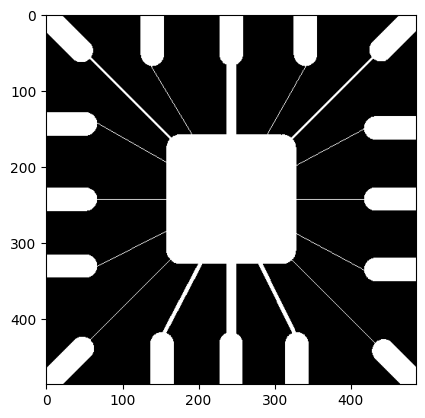

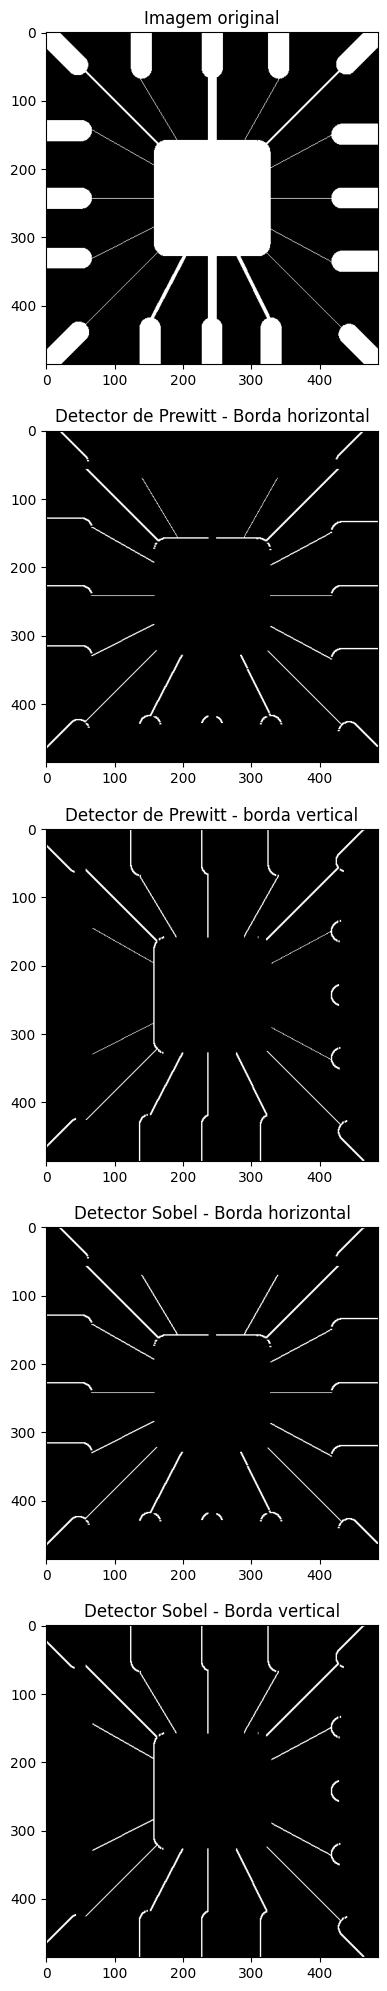

In [28]:
## -- Seu código termina AQUI -- ##

# Local da Imagem

# Leitura de imagem
img = plt.imread('wirebond_mask.tif')

# Plotando a Imagem
plt.imshow(img,cmap='gray')

#Aplicação dos detectores de borda de Prewitt

img_prewitt_p1 = cv.filter2D(img, -1, p1)  #Detecção de bordas na horizontal
img_prewitt_p2 = cv.filter2D(img, -1, p2)  #Detecção de bordas na vertical

#Aplicação dos detectores de borda sobel
img_sobel_s1 = cv.filter2D(img, -1, s1)   #Detecção de bordas na horizontal
img_sobel_s2 = cv.filter2D(img, -1, s2)  #Detecção de bordas na vertical

#Plots (resultados)

plt.figure(figsize = (25,25))
plt.subplot(5,1,1)
plt.imshow(img, cmap = "gray")
plt.title("Imagem original")

plt.subplot(5,1,2)
plt.imshow(img_prewitt_p1, cmap = "gray")
plt.title("Detector de Prewitt - Borda horizontal")

plt.subplot(5,1,3)
plt.imshow(img_prewitt_p2, cmap = "gray")
plt.title("Detector de Prewitt - borda vertical")

plt.subplot(5,1,4)
plt.imshow(img_sobel_s1, cmap = "gray")
plt.title("Detector Sobel - Borda horizontal")

plt.subplot(5,1,5)
plt.imshow(img_sobel_s2, cmap = "gray")
plt.title("Detector Sobel - Borda vertical")

plt.show()
## -- Seu código termina AQUI -- ##

### Comentário:

Analisando os resultados obtidos, percebemos que à detecção de bordas verticais, os kernels adotados para o operador sobel e de prewitt foram implementados pensando em bordas cujo gradiente tivesse sentido da esquerda para a direita. De modo que somente encontramos as bordas que estivessem entre uma transição de uma região com pixels pretos e pixels brancos, o que é evidenciado nos plots verticais gerados. Continuando, em relação à detecção de bordas horizontais, filtros adotados consideram somente as bordas cujo gradiente tivesse sentido na direção sul, ou seja, entre uma transição de uma região de pixels pretos seguida de uma região de pixels brancos.
Outro fato importante de evidenciarmos é a diferença da "grossura" da borda detectada, visto que quando comparamos os filtros de primeira ordem implementados pela lógica prewitt e sobel, verificamos que imagens processadas pelo primeiro possuem maior realce que o segundo, quando analisamos a espessura da borda. Isto é devido o filtro de sobel possui pesos maiores na matriz 3 x 3 adotada, o que diretamente melhora o realce de algumas bordas.
Entretano, mesmo considerando os aspectos diferentes apontados acima, os algoritmos de segmentação de bordas apresentam resultados próximo, pois são filtros da mesma família, ou seja, são filtros de primeira derivada. 

#### 1.2) Sobel e Laplaciano (Nota 1.5/10)

1. Leia a imagem ```house.tif```. Mostre a imagem na tela.
2. Aplique todos os detectores de bordas de Sobel na imagem lida no item 1. Mostre as imagens resultantes em um subplot.
2. Para cada *kernel*, aplique um *threshold* no resultado do filtro a fim de tentar manter somente as bordas que aquele filtro foi desenvolvido para detectar. Nas dicas deixamos um valor sugerido.
3. Some o resultado obtido por cada *kernel* em uma variável chamada  ```sobel_sum ```.
3. Aplique o detector de bordas Laplaciano na imagem ```house.tif```. Mostre em um subplot a imagem original, a soma de todos os resultados de Sobel (```sobel_sum```) e o resultado do Laplaciano. Coloque título nas imagens. O que se pode concluir?

**Dicas:**

* O valor de *threshold* sugerido é 220. Observe que para cada kernel, deve-se encontrar um valor mais adequado.

*  Faça um ```for loop``` para aplicar os filtros de Sobel. Isso simplifica o código.

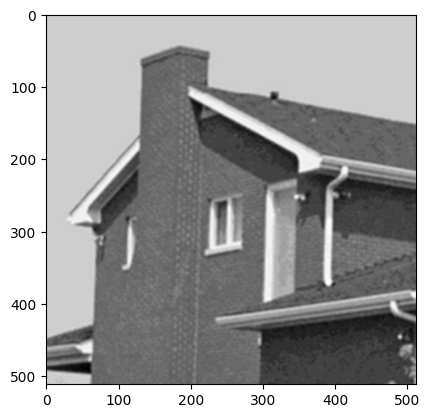

In [30]:
## -- Seu código começa AQUI -- ##

#Importar imagem original em grayscale
img_house = cv.imread("house.tif",0)

plt.imshow(img_house, cmap="gray")

## -- Seu código termina AQUI -- ##

Gradiente Sul
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]
Gradiente Leste
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
Gradiente Sudeste
[[-2 -1  0]
 [-1  0  1]
 [ 0  1  2]]
Gradiente Nordeste
[[ 0  1  2]
 [-1  0  1]
 [-2 -1  0]]
Gradiente Noroeste
[[ 2  1  0]
 [ 1  0 -1]
 [ 0 -1 -2]]
Gradiente Sudoeste
[[ 0 -1 -2]
 [ 1  0 -1]
 [ 2  1  0]]


Text(0.5, 1.0, 'Detecção de Bordas - Filtro de Primeira Ordem')

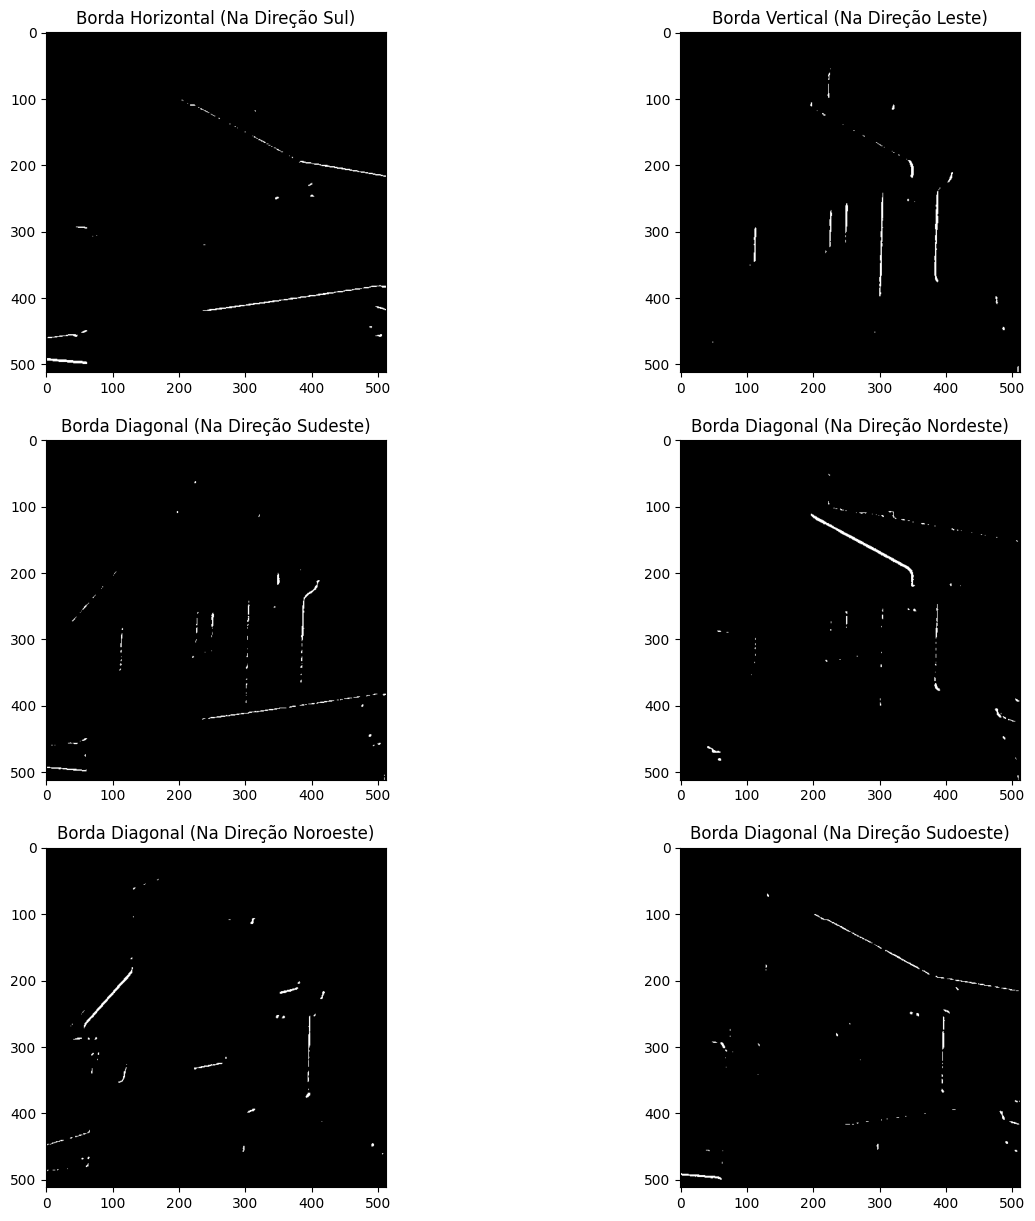

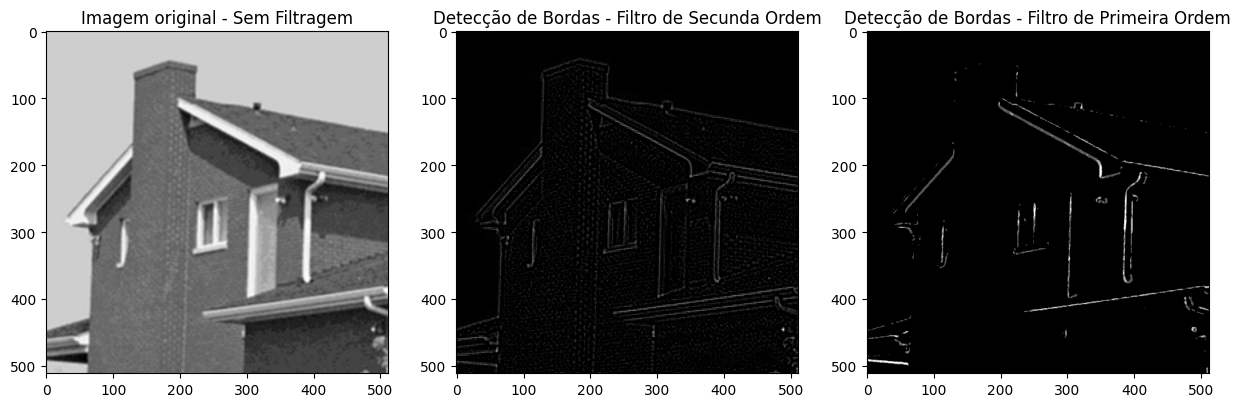

In [47]:
# DICA: você pode usar um espaço como este para simular os melhores thresholds para cada kernel.

#@title Teste Threshold{ run: "auto" }

Threshold = 197 #@param {type:"slider", min:0, max:255, step:1}

## -- Seu código começa AQUI -- ##

#sobel_sum irá armazenar a soma dos resultados das aplicações dos kernels dos detectores de sobel
sobel_sum = np.zeros(img_house.shape)

#print(sobel_sum)

#Variavel pra incrementar os subplot no loop
i = 1 

# Detecção de Bordas - Filtro Laplaciano
det_borda_l = cv.filter2D(img, -1, laplaciano)

#Resultados

plt.figure(figsize = (15,15))

# Vetor Legenda
legenda = ['Borda Horizontal (Na Direção Sul)'   ,
           'Borda Vertical (Na Direção Leste)'   ,
           'Borda Diagonal (Na Direção Sudeste)' ,
           'Borda Diagonal (Na Direção Nordeste)',
           'Borda Diagonal (Na Direção Noroeste)',
           'Borda Diagonal (Na Direção Sudoeste)']

legenda_filtros = ['Gradiente Sul'   ,
                   'Gradiente Leste'   ,
                   'Gradiente Sudeste' ,
                   'Gradiente Nordeste',
                   'Gradiente Noroeste',
                   'Gradiente Sudoeste']

# Lembrando que sobel = [s1,s2,s3,s4,s5,s6]

for kernel in sobel:
  # Printando os Filtros de Sobel - Primeira Derivada
  print(legenda_filtros[i-1])
  print(sobel[i-1])

  s = cv.filter2D(img, -1, kernel)

  #Aplicação do threshold na imagem original, com um valor médio de 220 para filtrar as bordas
  ret, thr = cv.threshold(s,Threshold,255,cv.THRESH_BINARY) 
  
  #Soma dos resultados dos filtros sobel aplicados
  sobel_sum = sobel_sum + thr                         
  
  # Plotando as Imagens filtradas pelos Filtros de Sobrel
  plt.subplot(3,2,i)
  plt.imshow(thr, cmap = 'gray')
  plt.title(legenda[i-1])
  i += 1

# Printando o comparativo

plt.figure(figsize = (15,15))
plt.subplot(1,3,1)
plt.imshow(img, cmap = 'gray')
plt.title("Imagem original - Sem Filtragem")

plt.subplot(1,3,2)
plt.imshow(det_borda_l , cmap = 'gray')
plt.title("Detecção de Bordas - Filtro de Secunda Ordem")

plt.subplot(1,3,3)
plt.imshow(sobel_sum, cmap = 'gray')
plt.title("Detecção de Bordas - Filtro de Primeira Ordem")

## -- Seu código termina AQUI -- ##

## 2) Influência da iluminação na segmentação (Nota 2.0/10)

<center><img src="https://github.com/LAVI-USP/SEL0339-SEL5886_2023/raw/main/imagens/pratica_04/abobora_.png" width="256" height="256"></center>

<center><caption><b> Figura 1:</b> Imagem abobora.tif.</b></caption></center>

1. Utilize o método de Otsu para binarizar a imagem `abobora.tif`.
2. Divida a imagem em 8, 32 e 256 sub-imagens, aplique o método de Otsu em cada uma delas e remonte a imagem final (Tenha em mente que a divisão deve ser feita de forma a segmentar em sub-regiões com o máximo de características semelhantes, de forma a se aproveitar da melhor forma o método utilizado).
3. Apresente a imagem original , e dos resultados dos itens 1 e 2 em um subplot. Coloque título em cada plot.
4. Comente os resultados obtidos.

(512, 512)


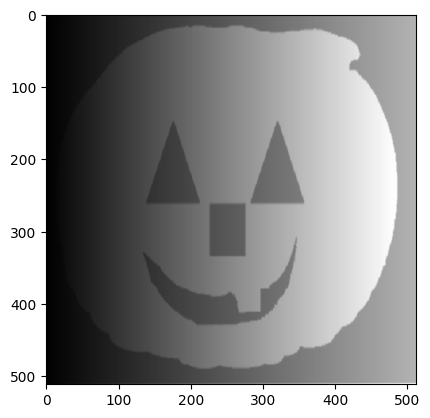

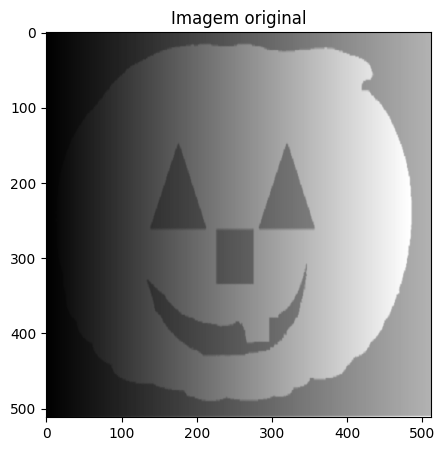

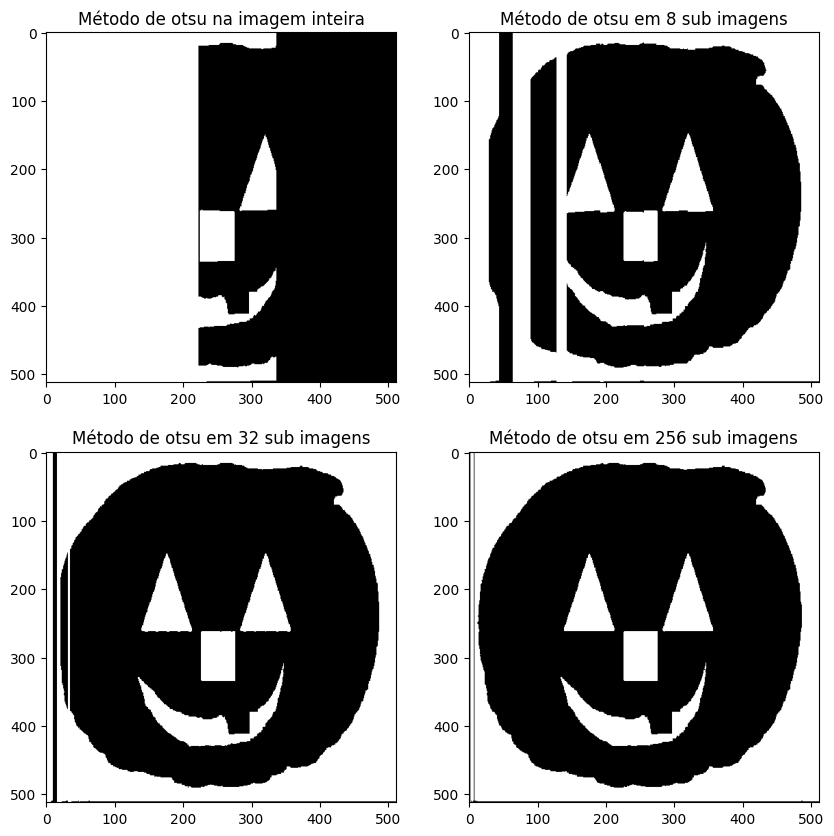

In [ ]:
## -- Seu código começa AQUI -- ##

#Função para realizar a subdivisão das imagens de forma geral
def subdivideImg(img,sub):
  imgRecovered = np.zeros(img.shape, np.uint8)
  xmin = 0
  xmax = int(img.shape[1]/sub)
  for i in range (sub):
    SubImage = img[:,xmin:xmax]
    #Aplicação do metodo de otsu
    ret, th = cv.threshold(SubImage, 0,255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
    imgRecovered[:,xmin:xmax] = th
    xmin = xmax
    xmax = xmax + int(img.shape[1]/sub)
  return imgRecovered

# Lendo a Imagem

img = cv.imread('abobora.tif',0)

plt.imshow(img, cmap='gray')

#Pegar tamanho da imagem
(m,n) = img.shape
print(img.shape)

#Aplicação do método de otsu
ret, th = cv.threshold(img, 0,255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)


#Aplicação do método de otsu nas sub divisões da imagem
otsu1 = subdivideImg(img,8)
otsu2 = subdivideImg(img,32)
otsu3 = subdivideImg(img,256)

#Resultados
plt.figure(figsize = (5,5))
plt.imshow(img, cmap = "gray")
plt.title("Imagem original")

plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.imshow(th, cmap = "gray")
plt.title("Método de otsu na imagem inteira")

plt.subplot(2,2,2)
plt.imshow(otsu1, cmap = "gray")
plt.title("Método de otsu em 8 sub imagens")

plt.subplot(2,2,3)
plt.imshow(otsu2, cmap = "gray")
plt.title("Método de otsu em 32 sub imagens")

plt.subplot(2,2,4)
plt.imshow(otsu3, cmap = "gray")
plt.title("Método de otsu em 256 sub imagens")

plt.show()
## -- Seu código termina AQUI -- ##

### Comentário: 

Analisando a image original da abóbora, concluímso que ela não possui intensidades de pixels constantes, pois a sua iluminação varia ao longo da imagem. Devido a isso, temos dificuldade na realização de uma limiarização global da imagem visando a identificação de uma única classe. Isso resultou da aplicação da limiarização, de modo a falhar na segmentação da imagem, identificando abóbora parcialment. 
Visando resolver a problemática acima, dividindo-se a imagem em sub imagens para a aplicação do método de otsu localmente, o que resultou num em algo positivo no final, visto que quando a medida que a imagem foi dividida, de 8,32 a 256 imagens, foi possível identificar a figura da abóbora. Isso foi possível, pois a medida que  o número de divisões da imagem aumentava, a largura de cada uma das faixas diminuia, acarretando em regiões recortadas que apresentem uma maior homogeneidade da intensidade de pixels, possibilitando, a partir da técnica de limiarização, a segmentação de forma eficiente.

## 3) Limiarização local (Nota 1.5/10)

<center><img src="https://github.com/LAVI-USP/SEL0339-SEL5886_2023/raw/main/imagens/pratica_04/sudoku_.png" width="256" height="156"></center>

<center><caption><b> Figura 2:</b> Imagem sudoku.tif.</b></caption></center>

1. A imagem `sudoku.tif` possui uma iluminação não uniforme. Aplique a binarização pelo método de limiarização local nessa imagem variando os parâmetros `blockSize` (tamanho da janela) e `C` (constante a ser diminuída da média) de forma a se obter um resultado satisfatório.

2. Aplique a binarização pelo método de Otsu e compare com o resultado obtido no item 1.

**Dicas:**

* A limiarização local pode ser feita pela função [cv.adaptiveThreshold](https://docs.opencv.org/master/d7/d1b/group__imgproc__misc.html#ga72b913f352e4a1b1b397736707afcde3). Utilize o método adaptativo `cv.ADAPTIVE_THRESH_MEAN_C` que calcula o limiar como sendo a média de uma vizinhança `blockSize x blockSize` subtraída de uma constante `C`.

``` python
# Limiarização local pela média
th3 = cv.adaptiveThreshold(img,maxVal,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,blockSize,C)
```

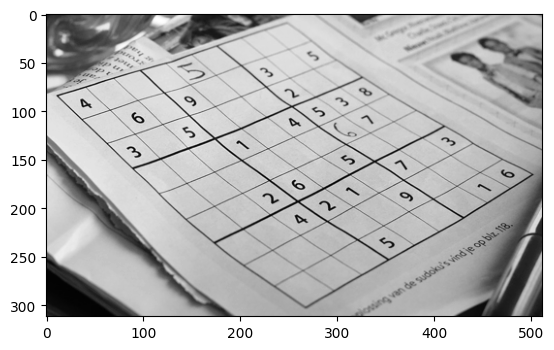

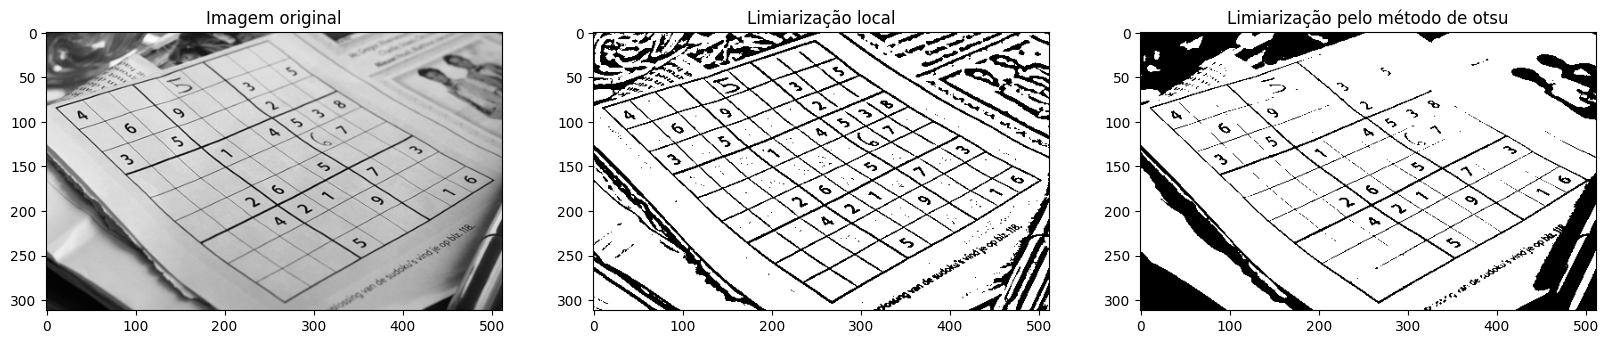

In [ ]:
## -- Seu código começa AQUI -- ##

# Lendo a Imagem

img = cv.imread('sudoku.tif',0)
plt.imshow(img, cmap='gray')

#Limiarização local pela média
blockSize = 11
C = 5
th_local = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,blockSize,C)

#Limiarização pelo método de otsu
ret, th_Otsu = cv.threshold(img, 0,255, cv.THRESH_BINARY + cv.THRESH_OTSU)

#Resultados
plt.figure(figsize = (20,20))
plt.subplot(1,3,1)
plt.imshow(img,cmap = "gray")
plt.title("Imagem original")

plt.subplot(1,3,2)
plt.imshow(th_local,cmap = "gray")
plt.title("Limiarização Local")

plt.subplot(1,3,3)
plt.imshow(th_Otsu,cmap = "gray")
plt.title("Limiarização - Método de Otsu")
plt.show()

## -- Seu código termina AQUI -- ##

### Comentários:
A limiarização local necessitou de um ajuste dos parâmetros blockSize e C, de modo que, no mínimo, a partir de um valor de blockSize igual a 11, quando C é igual a 5, o processo de limiarização local conseguiu identificar as linhas e dos números de forma nítida e bem ressaltada.  
Em relação à limiarização pelo método de otsu, observamos que o resultado não apresentou algo tão eficiente quanto comparado a limiarização local, pois método  otsu é um método de limiarização global, cujo busca um valor de threshold ótimo em toda a imagem. Apesar do método de otsu conseguir segmentar a imagem, já que havia uma grande probabilidade de ocorrência de pixels mais escuros,  mas algumas linhas e números não foram identificados de forma contínua, diferente na limiarização local. Além disso, no método de otsu, alguns detalhes ao fundo do jornal que contém o sudoku não foram identificados de forma suave, havendo uma perda de informação após a limiarização.

## 4) K-means (Nota 3.5/10)

Neste exercício, queremos isolar os cartões coloridos da imagem `cores.jpeg`.

1. Leia e plote a imagem `cores.jpeg`.
2. Converta a imagem lida no item 1 para o espaço de cores para HSV.
3. Aplique o algoritmo de K-means no canal MATIZ. Escolha o valor k mais adequado. Repare que não será possível isolar todos os cartões neste passo. Mostre os valores máximo e mínimo da imagem resultante. Comente sobre o agrupamento resultante.
4. Aplique o algoritmo de K-means no canal SATURAÇÃO. Escolha o valor k mais adequado. Repare que não será possível isolar todos os cartões neste passo. Mostre os valores máximo e mínimo da imagem resultante. Comente sobre o agrupamento resultante.
5. Transforme as imagens resultantes dos itens 3 e 4 em máscaras para isolar os cartões destacados. Ou seja, analise um valor de threshold que transforma as imagens em imagens binárias. Mostre as máscaras obtidas.
6. Faça uma operação de OR entre as duas máscaras obtidas para obter uma máscara final. Mostre esta máscara.
7. Transforme a imagem `cores.jpeg`. para o espaço de cores RGB. Aplique a máscara obtida em 6 nesta imagem. Queremos que o fundo fique preto e apenas os cartões coloridos sejam mostrados na imagem.

**Dicas:**

* Você pode utilizar a função [cv.kmeans](https://docs.opencv.org/master/d5/d38/group__core__cluster.html#ga9a34dc06c6ec9460e90860f15bcd2f88) para a segmentação. Você pode utilizar 20 iterações e epsilon = 0.01 para o K-means.

* Para utilizar o K-means você deve passar a imagem como um vetor (1D). O método `.ravel()` e `.flatten()` fazem isso. Além disso, a imagem deve estar em `float32`.

* Para retornar a imagem resultante do k-means para o shape original, você pode utilizar a função `img_res.reshape(shape original)`.

``` python
criterio = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, nIteracao, epsilon)
ret,label,centers = cv.kmeans(myVector, nCluster(k), None, criterio, 5, cv.KMEANS_PP_CENTERS)

```

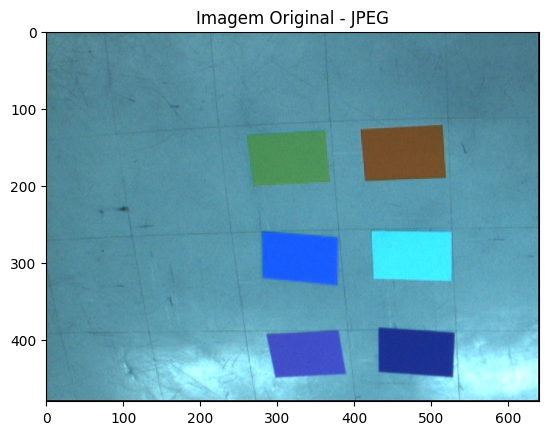

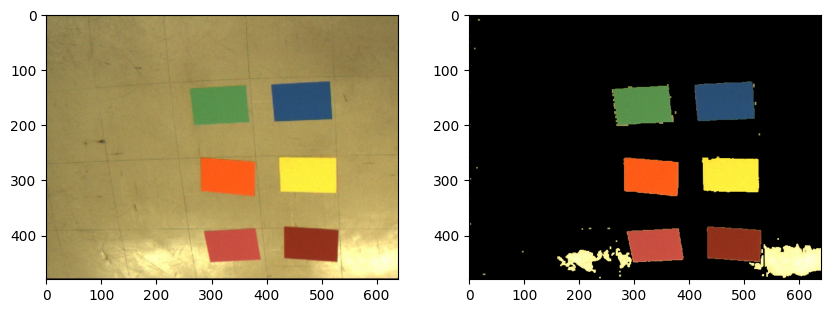

In [ ]:
## -- Seu código começa AQUI -- ##

img_bgr = cv.imread("cores.jpeg")
plt.imshow(img_bgr)
plt.title("Imagem Original - JPEG")

img_hsv = cv.cvtColor(img_bgr, cv.COLOR_BGR2HSV)

#Capturar os canais H, S, V para aplicar posteriormente o K-means na matiz (H)
(H,S,V) = cv.split(img_hsv)

nCluster = 5   #K = 5 (número de classes para segmentar)
nIteracao = 20
epsilon = 0.01

# K-means aqui
convertedImg = H.astype(np.float32)   #Converter imagem para o tipo float32
imgVector = np.ravel(convertedImg)
criterio = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, nIteracao, epsilon)
ret,label,centers = cv.kmeans(imgVector, nCluster, None, criterio, 5, cv.KMEANS_PP_CENTERS)

## -- Seu código termina AQUI -- ##


# Cálcula a área de cada label
areas = np.empty_like(centers)
for i in range(centers.shape[0]):
  mask = np.where(label == i, 1, 0).reshape(img_hsv[:,:,0].shape)
  areas[i] = mask.sum()

# Ordem crescente
areas = np.sort(areas,axis=0)

# Cria uma mascara para cada label e aplica na imagem original
segment = np.zeros_like(img_bgr, np.uint8)

for i in range(centers.shape[0]):
  mask = np.where(label == i, 1, 0).reshape(img_hsv[:,:,0].shape)
  # Se for o fundo, atribua o valor 0
  if(mask.sum() == areas[-1]):
    mask[:] = 0
  mask = cv.morphologyEx(np.uint8(mask), cv.MORPH_OPEN, cv.getStructuringElement(cv.MORPH_RECT,(3,3)))
  mask = np.tile(np.expand_dims(mask,axis=-1),(1,1,3))
  segment = segment + np.uint8(mask * img_bgr)

# Mostra o resultado
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(img_bgr,cv.COLOR_BGR2RGB));
plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(segment,cv.COLOR_BGR2RGB));
## -- Seu código termina AQUI -- ##

### Comentários: 

O método de segmentação através do k-means, adotando um número de clusters K = 5, 20 iterações e um epsilon = 0.01, identificamos corretamente os 6 cartões coloridos, porém é válido ressaltar que, por meio da aplicando o k-means no canal de matiz da imagem convertida para o espaço hsv, separamos com maior facilidade as cores a serem identificadas em grupos de classes, visto que cada cartão possui uma cor diferente. 
Outro ponto a se ressalta que adotamos cluster K = 5, ao invés de K=6 para a identificação dos 6 cartões, pois os cartões que apresentam intensidade de pixels próximos entre si, devido ao fato de serem cores próximas uma das outras no canal da matiz (canal H). Ou seja, como os dois cartões da última linha possuem cores ligeiramente próximas entre si, então o método atribuiu os pixels dessas cores à um mesmo agrupamento, pois eles estavam mais próximos ao valor médio de um mesmo grupo em específico.